# Neural Networks

In [1]:
# MNIST 
# DataLoader, Transformations
# Multi-layer neural networks, activation functions
# Loss and optimizer
# Training loop w/ batch training
# Model evaluation
# GPU support

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [20]:
device = torch.device('cuda')

In [4]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                train=True, transform=transforms.ToTensor(),
                download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                train=False, transform=transforms.ToTensor())

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                 batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                 batch_size=batch_size, shuffle=False)

In [10]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


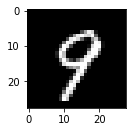

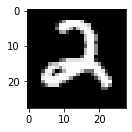

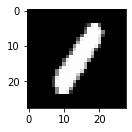

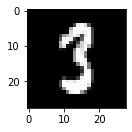

In [13]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [23]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Progress
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{total_steps}, loss = {loss.item():.4f}')

epoch 1/2, step 100/600, loss = 0.2067
epoch 1/2, step 200/600, loss = 0.0982
epoch 1/2, step 300/600, loss = 0.0966
epoch 1/2, step 400/600, loss = 0.0909
epoch 1/2, step 500/600, loss = 0.1693
epoch 1/2, step 600/600, loss = 0.1416
epoch 2/2, step 100/600, loss = 0.0305
epoch 2/2, step 200/600, loss = 0.0948
epoch 2/2, step 300/600, loss = 0.2149
epoch 2/2, step 400/600, loss = 0.1760
epoch 2/2, step 500/600, loss = 0.1092
epoch 2/2, step 600/600, loss = 0.1218


In [29]:
# Evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        
        # value, index of network pred output tensors
        _, preds = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(n_correct)
    print(n_samples)
    print(f'accuracy = {acc}')

58518
60000
accuracy = 97.53


# Convolutional Neural Networks